# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
#!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data\cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

76

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [93]:
#x=cities[0]
#cityweather=requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={x}&appid={weather_api_key}').json()
#pprint(cityweather)

'codrington'

In [117]:
baseurl= 'http://api.openweathermap.org/data/2.5/weather?q='
key='&appid='+weather_api_key

realCities,fakeCities=[],[]
maxtemps,hums,clouds,winds,lats,lngs,countries,dts = [],[],[],[],[],[],[],[]

for city in cities: 
    url = baseurl + city + key
    weatherDict = requests.get(url).json()
    if 'coord' in weatherDict:
        K=float(weatherDict['main']['temp_max'])
        F = ((K + (-273.15)) * (9/5)) + 32
        maxtemps.append(F)
        hums.append(weatherDict['main']['humidity'])
        clouds.append(weatherDict['clouds']['all'])
        winds.append(weatherDict['wind']['speed'])
        lats.append(weatherDict['coord']['lat'])
        lngs.append(weatherDict['coord']['lon'])
        countries.append(weatherDict['sys']['country'])
        dts.append(weatherDict['dt'])
        realCities.append(city)
        
        y=len(realCities)
        print(f'Successfully retrieved data for city {y}: {city}')
    else:
        fakeCities.append(city)

print('\n\n\nData retrieval complete.')

cityDF = pd.DataFrame({
    'City':realCities,
    'Latitude':lats,
    'Longitude':lngs,
    'Maximum Temperature':maxtemps,
    'Humidity':hums,
    'Cloud Cover':clouds,
    'Wind Speed':winds,
    'Country':countries,
    'Datetime':dts
})


Successfully retrieved data for city 1: la ronge
Successfully retrieved data for city 2: tenosique
Successfully retrieved data for city 3: dinguiraye
Successfully retrieved data for city 4: punta arenas
Successfully retrieved data for city 5: atuona
Successfully retrieved data for city 6: bahia de caraquez
Successfully retrieved data for city 7: mataura
Successfully retrieved data for city 8: porbandar
Successfully retrieved data for city 9: koumac
Successfully retrieved data for city 10: shimanovsk
Successfully retrieved data for city 11: ituporanga
Successfully retrieved data for city 12: gizo
Successfully retrieved data for city 13: cayenne
Successfully retrieved data for city 14: codrington
Successfully retrieved data for city 15: uige
Successfully retrieved data for city 16: saint george
Successfully retrieved data for city 17: caravelas
Successfully retrieved data for city 18: hobart
Successfully retrieved data for city 19: kapaa
Successfully retrieved data for city 20: bluff
Suc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:
cityDF.to_csv('cities.csv')

cityDF.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Cover,Wind Speed,Country,Datetime
0,la ronge,55.1001,-105.2842,46.652,42,1,3.09,CA,1622082236
1,tenosique,17.4833,-91.4333,77.468,86,100,2.85,MX,1622082236
2,dinguiraye,11.3000,-10.7167,76.154,71,100,2.67,GN,1622082236
3,punta arenas,-53.1500,-70.9167,32.108,74,20,5.26,CL,1622082237
4,atuona,-9.8000,-139.0333,79.628,75,76,6.16,PF,1622082237


In [119]:
cityDF.shape

(68, 9)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [120]:
cityDF['Humidity'].max()
# No cities over 100% humidity
# but random selection may change this later

98

In [121]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_cityDF=cityDF[cityDF['Humidity']<=100]
new_cityDF.shape

(68, 9)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

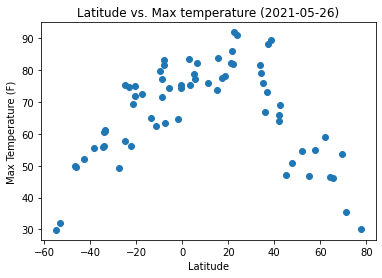

In [127]:
import datetime
today=datetime.date.today()

plt.scatter(new_cityDF['Latitude'],new_cityDF['Maximum Temperature'])
plt.title(f'Latitude vs. Max temperature ({today})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('latVtemp')
plt.show()

## Latitude vs. Humidity Plot

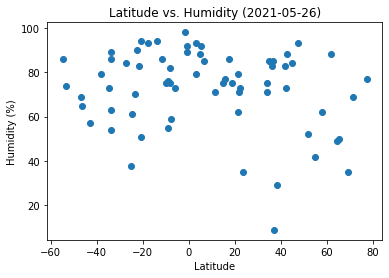

In [129]:
plt.scatter(new_cityDF['Latitude'],new_cityDF['Humidity'])
plt.title(f'Latitude vs. Humidity ({today})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('latVhum')
plt.show()

## Latitude vs. Cloudiness Plot

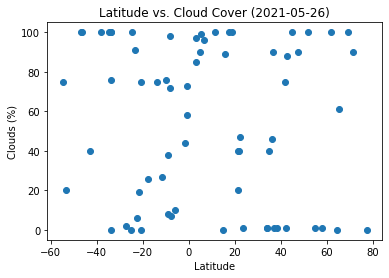

In [130]:
plt.scatter(new_cityDF['Latitude'],new_cityDF['Cloud Cover'])
plt.title(f'Latitude vs. Cloud Cover ({today})')
plt.ylabel('Clouds (%)')
plt.xlabel('Latitude')
plt.savefig('latVcloud')
plt.show()

## Latitude vs. Wind Speed Plot

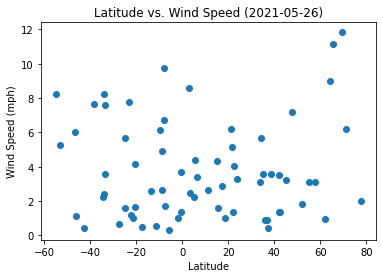

In [131]:
plt.scatter(new_cityDF['Latitude'],new_cityDF['Wind Speed'])
plt.title(f'Latitude vs. Wind Speed ({today})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('latVwind')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


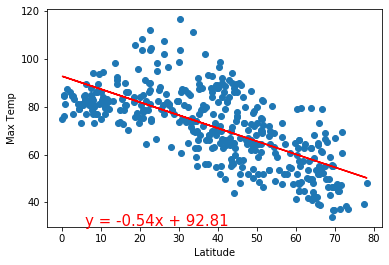

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


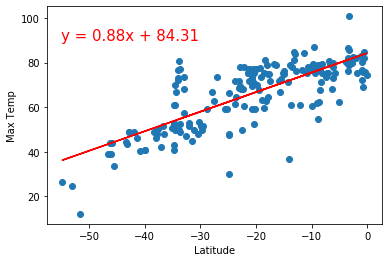

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


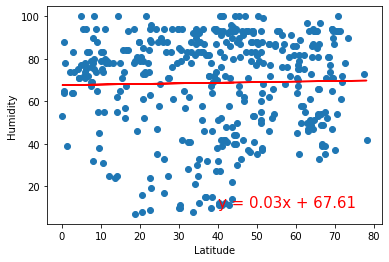

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


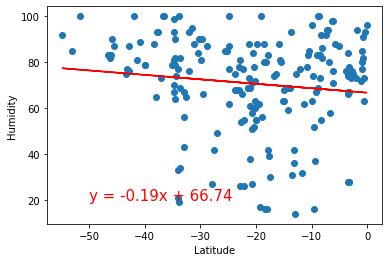

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


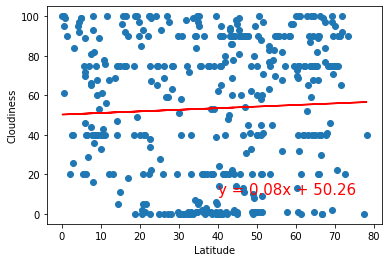

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


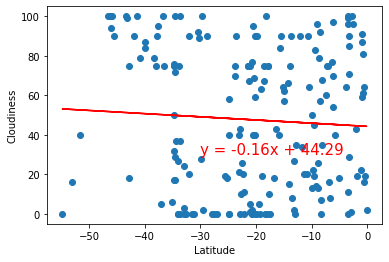

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


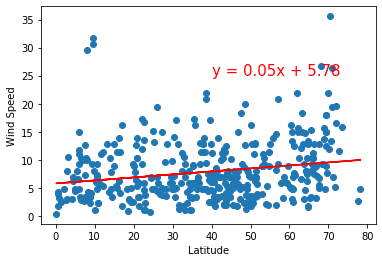

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


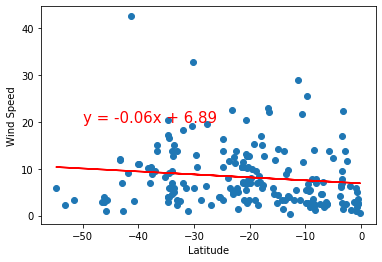